# CIGRE TB 880 - 2022
## Power cable rating examples for calculation tool verification
## Case #0-2: Sub-case study with touching HDPE ducts

Reference IEC standards:
- "IEC 60287-1-1, Electric Cables - Calculation of the Current Rating - Part 1-1: Current Rating Equations (100 % load factor) and Calculation of Losses – General", IEC,  2014-11.  
- "IEC 60287-2-1, Electric Cables – Calculation of the Current Rating – Part 2-1: Thermal Resistance – Calculation of Thermal Resistance, Edition 2.0", IEC, 2015-2.

In [717]:
# Import libraries
import math as mt
#import numpy as np
#import pandas as pd
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 

# 4.7 Case #0-2: Sub-case study with touching HDPE ducts

<div>
<img src="./img/4_7_trefoil_HDPE_pipes.png" width="150"/> 
</div>

**Input data:**

In [718]:
# 4.2.1 Grid parameters

U = 132 #[kv] Voltage level
f = 50 #[Hz] Frequency

<div>
<img src="./img/img2_xlpe132kV.png" width="300"/> <img src="./img/img3_cross.png" width="450"/>
</div>

In [719]:
# 4.2.2 Cable parameters

# List of the cable composition: [Conductor, Conductor_screen, XLPE_insulation, Insulation_screen, Sheath, Oversheath]
thk = [0, 1.5, 15.5, 1.3, 0.8, 3.5] #[mm] Thickness of the layer
dia = [0]*6 #[mm] Diameter over the layer. Initialize the size of list 
dia[0] = 30.3 #[mm] Conductor diameter (630 mm2)


for i in range(1,len(dia)):
    dia[i] = dia[i-1] + 2*thk[i]
print(dia)

# Conductor
R_0 = 28.3e-6 #[Ohm/m] DC resistance at 20°C. From IEC 60228 Table 2
alpha_20 = 3.93e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Copper)
k_s = 1 # Skin effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2
k_p = 1 # Proximity effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2

# Insulation layer
epsilon = 2.5 # Relative permittivity. From IEC 60287-1-1 Table 3
tan_delta = 0.001 # Loss factor. From IEC 60287-1-1 Table 3
rho_i = 3.5 #[Km/W] Thermal resistivity. From CIGRE TB 640 Table 1
rho_sc = 2.5 #[Km/W] Thermal resistivity screen (semi-conducting layer). CIGRE WG B1.56, IEC 60949

# Metal sheath
t_s = thk[4] #[mm] From Manufacturer datasheet
rho_s_20 = 2.84e-8 #[Ohm/m] Resistivity at 20°c. From IEC 60287-1-1 Table 1
alpha_s_20 = 4.03e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Aluminium)

# Oversheath
rho_Tos = 3.5 #[Km/W] Thermal resistivity. From IEC 60287-2-1 Table 1

[30.3, 33.3, 64.3, 66.89999999999999, 68.49999999999999, 75.49999999999999]


In [720]:
# 4.2.5 Operating conditions

theta_c_max = 90 #[°C] Maximum operating temperature of conductor. User
theta_a = 20 #[°C] Ambient ground temperature. From IEC 60287-3-1 Section 3.2.1
rho_Tsoil = 1 #[Km/W] Thermal resistivity. From IEC 60287-3-1 Section 3.2.2

##  4.7 Case #0-2: Sub-case study with touching HDPE ducts



### 4.4.1 Capacitance

$ C = \frac{\epsilon}{18\ln(\frac{D_i}{d_c})} 10^{-9} $ (F/m). From IEC 60287-1-1 Section 2.2

In [721]:
# 4.4.1 Capacitance

d_c = dia[1] #[mm] diameter of conductor, including screen, if any
D_i = dia[2] #[mm] external diameter of the insulation (excluding screen)

C = (epsilon/(18*mt.log(D_i/d_c)))*1e-9 #[F/m] From IEC 60287-1-1 Section 2.2
print("C = %.10E F/m" % C)

C = 2.1107662202E-10 F/m


In [722]:
# 4.7.1.1 Reactance

omega = 2*mt.pi*f #[rad/s] Angular frequency
D0 = 140 #[mm] -  diameter of duct (external)
Dd = 119.4 #[mm] -  diameter of duct (internal)
Dpipe=(D0-Dd)/2 #[mm] - thickness of pipe

s = D0#dia[5] #[mm] distance between conductor axes in the electrical section being considered
d = D_i + 2*thk[3] + thk[4] #[mm] mean diameter of the sheath


X = 2*omega*1e-7*mt.log(2*s/d) #[Ohm/m] From IEC 60287-1-1 Section 2.3.1
print("X = %.10E \u03A9/m" % X)

X = 8.9202596895E-05 Ω/m


In [723]:
# 4.4.3 Electrical resistance of the metal sheath at 20°C

A_s = mt.pi*d*t_s #[mm2] cross section

R_s0 = rho_s_20/(A_s*1e-6) #[Ohm/m]
print("Rs0 = %.10E \u03A9/m" % R_s0)

Rs0 = 1.6691286499E-04 Ω/m


In [724]:
# 4.4.4 Thermal resistance between conductor and sheath

t_1 = thk[1:4] #[mm] insulation thickness
d_c_arr = dia[0:3] #[mm] diameter
rho_T = [rho_sc, rho_i, rho_sc] #[Km/W] Thermal resistivity
T1_layer = [0]*len(rho_T) #[Km/W] Thermal resistance

for i in range(len(T1_layer)):
    T1_layer[i] = (rho_T[i]/(2*mt.pi))*mt.log(1+2*t_1[i]/d_c_arr[i]) #[Km/W] From IEC 60287-2-1 Section 4.1.2.1

T1 = sum(T1_layer) #[Km/W]
print("T1 = %.10f Km/W" % T1)

T1 = 0.4198714890 Km/W


In [725]:
# 4.7.1.2 Thermal resistance of the oversheath

t_3 = thk[5] #[mm] oversheath thickness
D_a = dia[4] #[mm] reference diameter

T3 = (1/(2*mt.pi))*rho_Tos*mt.log(1+2*t_3/D_a) #[Km/W] From IEC 60287-2-1 Section 4.1.4.1
T3 = T3 #[Km/W] From IEC 60287-2-1 Section 4.1.4.1; without multiplication by a factor 1.6
print("T3 = %.10f Km/W" % T3)

T3 = 0.0541996092 Km/W


In [726]:
#4.7.2 External thermal resistance
#The external thermal resistance of a cable in a duct consists of three parts:
# a) The thermal resistance of the air space between the cable surface and duct internal surface T′4,
# b) The thermal resistance of the duct itself, T’′4,
# c) The external thermal resistance of the duct T’’′4.


#4.7.2.1 Thermal resistance between cable and duct (or pipe) T4’
Uconstant=1.87 #constant for plastic duct; table 4
V=0.312 #constant for plastic duct; table 4
Y=0.0037 #constant for plastic duct; table 4
De = dia[5] #[mm], diameter
Om=70 #[celsius], maximum operating temperature

T4_1 = Uconstant/(1+0.1*(V+Y*Om)*De)
print("T4_1 = %.10f Km/W" % T4_1)


#4.7.2.2 Thermal resistance of the duct (or pipe) itself T4′′
T4_2 = (1/(2*mt.pi))*rho_Tos*mt.log(D0/Dd)
print("T4_2 = %.11f Km/W" % T4_2)

#4.7.2.3 External thermal resistance of the duct (or pipe) T4′′′
L = 1000 #[mm]
u = 2*L/D0
rho_T_ex = 1 #[Km/W]
T4_3 = 1/(2*mt.pi)*(mt.log(2*u)+2*mt.log(u))
print("T4_3 = %.11f Km/W" % T4_3)


T4 = T4_1+T4_2+T4_3 #[Km/W]
print("T4 = %.11f Km/W" % T4)

T4_1 = 0.3520961015 Km/W
T4_2 = 0.08866064719 Km/W
T4_3 = 1.38002093961 Km/W
T4 = 1.82077768833 Km/W


In [727]:
# 4.4.7 Dielectric losses

U_0 = U/mt.sqrt(3)*1e3 #[V]

W_d = omega*C*U_0*U_0*tan_delta #[W/m] From IEC 60287-1-1 Section 2.2

print("Wd = %.10f W/m" % W_d)

Wd = 0.3851382172 W/m


## 4.5 case #0-1: Results dependent on the temperature
### 4.5.1  Results linked to the maximum operating temperature
### 4.5.2 First iteration & 4.5.3 Next iterations

In [728]:
# Criteria of convergence
tempTol = 1e-11 #[K] Temperature tolerance threshold for convergence
currTol = 1e-11 #[A] Current tolerance threshold for convergence
maxIte = 10 # Maximum number of iterations

# Other parameters
n = 1 # Single-core cable
d_c = dia[0] # Conductor diameter
lambda_2 = 0 # The cable is unarmoured
T2 = 0 # The cable is unarmoured
# NOTE: IEC ArmoUred Cable is not the same that NEC(NFPA 70) Armored Cable (Type AC - Article 320), which is similar to Metal-Clad Cable (Type MC Article 330)

# Variable Preallocation
R = [0]*maxIte #[Ohm/m] AC resistance of conductor
R_s = [0]*maxIte #[Ohm/m] Resistance of sheath
lambda_1 = [0]*maxIte # Loss factor
I = [0]*maxIte #[A] Current rating
W_c = [0]*maxIte #[W/m] Conductor losses
W_s = [0]*maxIte #[W/m] Sheath losses
theta_c = [0]*maxIte #[°C] Conductor operation temperature
theta_s = [0]*maxIte #[°C] Sheath temperature

# Initial values
theta_c[0] = theta_c_max # Maximum allowable conductor temperature
theta_s[0] = theta_c_max-10 # Assumption to initializate!

for i in range(maxIte):
    print("Iteration: %2d" % (i+1))


    T4_1 = Uconstant/(1+0.1*(V+Y*Om)*De)
    T4 = T4_1+T4_2+T4_3 #[Km/W]
    #print("T4 iteration = %.10f Km/W" % T4)

    # 4.5.1  Results linked to the maximum operating temperature
    # 4.5.1.1 DC resistance of conductor
    R_prime = R_0*(1+alpha_20*(theta_c[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.1.1
    #print("R' = %.10E W/m" % R_prime)
    
    # 4.5.1.2 Skin effect factor
    x_s = mt.sqrt(8*mt.pi*f/R_prime*1e-7*k_s) # From IEC 60287-1-1 Section 2.1.2
    # For 0 < x_s <= 2,8
    y_s = x_s**4/(192+0.8*x_s**4)
    #print("xs = %.10f\nys = %.10f" % (x_s, y_s))
    
    # 4.5.1.3 Proximity effect factor 
    x_p = mt.sqrt(8*mt.pi*f/R_prime*1e-7*k_p) # From IEC 60287-1-1 Section 2.1.4.1
    y_p = x_p**4/(192+0.8*x_p**4)*(d_c/s)**2*(0.312*(d_c/s)**2+1.18/(x_p**4/(192+0.8*x_p**4)+0.27))
    #print("xp = %.10f\nyp = %.10f" % (x_p, y_p))
    
    # 4.5.1.4 AC resistance of conductor 
    R[i] = R_prime*(1+y_s+y_p) #[Ohm/m] From IEC 60287-1-1 Section 2.1
    #print("R = %.10E Ohm/m" % R[i])
    
    # 4.5.2 First iteration & 4.5.3 Next iterations
    # 4.5.2.1 Resistance of sheath at operating temperature
    R_s[i] = R_s0*(1+alpha_s_20*(theta_s[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.3
    #print("Rs = %.10E Ohm/m" % R_s[i])
    
    # 4.5.2.2 Losses caused by circulating currents
    lambda_1_prime = (R_s[i]/R[i])*(1/(1+(R_s[i]/X)**2)) # From IEC 60287-1-1 Section 2.3.1
    lambda_1_prime2 = 0
    lambda_1[i] = lambda_1_prime + lambda_1_prime2
    print("\u03BB1 = %.10f" % lambda_1[i])
    
    # 4.5.2.3 Permissible current rating
    Delta_theta = theta_c[i] - theta_a
    I[i] = mt.sqrt((Delta_theta-W_d*(0.5*T1+n*(T2+T3+T4)))/(R[i]*T1+n*R[i]*(1+lambda_1[i])*T2+n*R[i]*(1+lambda_1[i]+lambda_2)*(T3+T4))) #[A] From IEC 60287-1-1 Section 1.4.1.1
    print("I = %.10f A" % I[i])
    
    # 4.5.2.4 Losses in conductor and sheath
    W_c[i] = R[i]*I[i]**2 #[W/m]
    W_s[i] = lambda_1[i]*W_c[i] #[W/m]
    print("Wc = %.10f W/m\nWs = %.10f W/m" % (W_c[i], W_s[i]))
    
    # 4.5.2.5 Temperature on cable components
    theta_j = theta_a + n*(W_c[i]+W_s[i]+W_d)*T4 #[°C] Jacket. From IEC 60287-1-1 Section 1.4.1.1
    theta_s[i] = theta_j + n*(W_c[i]+W_s[i]+W_d)*T3 #[°C] Metal sheath 
    theta_c[i] = theta_s[i] + n*(W_c[i]+W_d/2)*T1 #[°C] Conductor
    print("\u03B8j = %.10f °C\n\u03B8s = %.10f °C\n\u03B8c = %.10f °C" % (theta_j, theta_s[i], theta_c[i]))
    
    # Convergence evaluation
    Delta_theta_s = abs(theta_s[i] - theta_s[i-1])
    Delta_theta_c = abs(theta_c[i] - theta_c[i-1])
    Delta_theta1 = max(Delta_theta_s, Delta_theta_c)
    Delta_I = abs(I[i] - I[i-1])
    
    if (Delta_theta1 < tempTol) and (Delta_I < currTol):
        print("Convergence reached after %2d iterations" % (i+1))
        break
    elif i+1 == maxIte:
        print("Convergence criteria not reached after %2d iterations" % maxIte)
    else:        
        Om = theta_j-0.5*T4_1*(W_c[i]+W_d+W_s[i]) #mean air gap temperature value change
        theta_s[i+1] = theta_s[i] # Update for next iteration 
        print("\u03B8s = %.10f °C" % (theta_s[i+1]))
        theta_c[i+1] = theta_c[i]

Iteration:  1
λ1 = 0.8387035149
I = 680.6595349744 A
Wc = 17.8923931138 W/m
Ws = 15.0064129937 W/m
θj = 80.6026632061 °C
θs = 82.4066399825 °C
θc = 90.0000000000 °C
θs = 82.4066399825 °C
Iteration:  2
λ1 = 0.8342165243
I = 682.8094655127 A
Wc = 18.0056014123 W/m
Ws = 15.0205702283 W/m
θj = 80.5482271071 °C
θs = 82.3591070457 °C
θc = 90.0000000000 °C
θs = 82.3591070457 °C
Iteration:  3
λ1 = 0.8343048317
I = 682.8140883734 A
Wc = 18.0058452217 W/m
Ws = 15.0223636681 W/m
θj = 80.5480143204 °C
θs = 82.3590046771 °C
θc = 90.0000000000 °C
θs = 82.3590046771 °C
Iteration:  4
λ1 = 0.8343050219
I = 682.8144604072 A
Wc = 18.0058648428 W/m
Ws = 15.0223834628 W/m
θj = 80.5480039457 °C
θs = 82.3589964387 °C
θc = 90.0000000000 °C
θs = 82.3589964387 °C
Iteration:  5
λ1 = 0.8343050372
I = 682.8144647689 A
Wc = 18.0058650729 W/m
Ws = 15.0223839303 W/m
θj = 80.5480038113 °C
θs = 82.3589963421 °C
θc = 90.0000000000 °C
θs = 82.3589963421 °C
Iteration:  6
λ1 = 0.8343050374
I = 682.8144648684 A
Wc = 18.0058

### Results

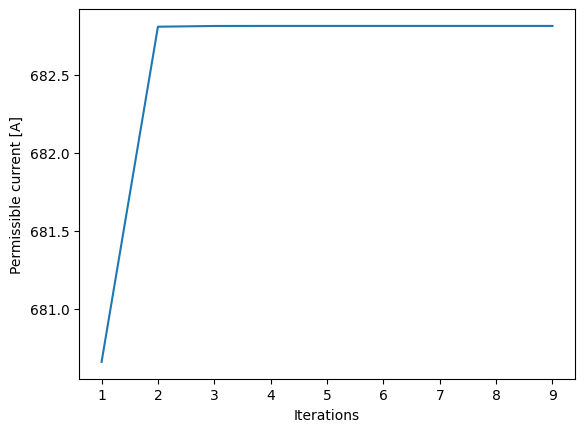

In [729]:
# Permissible current convergence plot
I = I[:i+1]

plt.figure()
plt.plot(list(range(1,i+2)),I)
plt.xlabel('Iterations')
plt.ylabel('Permissible current [A]')
plt.show()

In [730]:
# Permissible current rounding
print("The permissible current rating of one conductor is equal to %10f A" % I[i]) 

if I[i] < 200:
    I_rating = int(I[i])
elif I[i] < 500:
    I_rating = int(I[i]/5)*5
else:
    I_rating = int(I[i]/10)*10
     
print("The permissible current rating of one conductor is equal to %5d A" % I_rating)

The permissible current rating of one conductor is equal to 682.814465 A
The permissible current rating of one conductor is equal to   680 A
